In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np

import matplotlib as mpl
sys.path.insert(1, "/home/dima/Projects/NNCompression")
from pathlib import Path

from visualize import plot_quant_acc, plot_quant_mean_perturb_acc, combine_result_dataset
from utils import get_mean_std_run

In [2]:
run_data_folder = "../result/grid_pert_orig/"

total_data = combine_result_dataset(run_data_folder)
total_data

,epoch,train_loss,valid_loss,train_cross_entropy,valid_cross_entropy,accuracy,test_epoch,quant_2_accuracy,quant_3_accuracy,quant_4_accuracy,...,run_num,total_idx,batch_size,learning_rate,perturb_start,perturb_amount,perturb_variance,perturb_loss_acc,perturb_loss,trial_idx
0,40,2.297564,2.284258,2.297564,2.284258,20.56,3,19.16,20.40,28.26,...,0,1,256,0.01,5,30,0.001,sum,0.0010,144
1,40,2.265548,2.237705,2.265548,2.237705,38.51,3,19.16,20.40,28.26,...,0,2,256,0.01,5,30,0.001,sum,0.0010,144
2,40,2.176074,2.070762,2.176074,2.070762,49.42,3,19.16,20.40,28.26,...,0,3,256,0.01,5,30,0.001,sum,0.0010,144
0,40,1.795733,1.418661,1.795733,1.418661,64.55,6,20.75,25.85,28.97,...,0,4,256,0.01,5,30,0.001,sum,0.0010,144
1,40,1.147020,0.965215,1.146994,0.965215,68.16,6,20.75,25.85,28.97,...,0,5,256,0.01,5,30,0.001,sum,0.0010,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,60,0.457935,0.453445,0.457935,0.453445,82.52,57,26.37,26.18,66.92,...,0,56,512,0.03,5,5,0.001,mean,0.0001,35
2,60,0.454661,0.449697,0.454661,0.449697,82.96,57,26.37,26.18,66.92,...,0,57,512,0.03,5,5,0.001,mean,0.0001,35
0,60,0.455904,0.445670,0.455904,0.445670,82.44,60,19.05,40.33,75.09,...,0,58,512,0.03,5,5,0.001,mean,0.0001,35
1,60,0.453228,0.437194,0.453228,0.437194,82.73,60,19.05,40.33,75.09,...,0,59,512,0.03,5,5,0.001,mean,0.0001,35


In [4]:
total_data.columns

Index(['epoch', 'train_loss', 'valid_loss', 'train_cross_entropy',
       'valid_cross_entropy', 'accuracy', 'test_epoch', 'quant_2_accuracy',
       'quant_3_accuracy', 'quant_4_accuracy', 'quant_8_accuracy',
       'quant_16_accuracy', 'run_num', 'total_idx', 'batch_size',
       'learning_rate', 'perturb_start', 'perturb_amount', 'perturb_variance',
       'perturb_loss_acc', 'perturb_loss', 'trial_idx'],
      dtype='object')

In [5]:
total_data["trial_idx"]

0    144
1    144
2    144
0    144
1    144
    ... 
1     35
2     35
0     35
1     35
2     35
Name: trial_idx, Length: 8280, dtype: object

In [12]:
last_trial_valid

,trial_idx,test_epoch
0,1,20
1,10,20
2,100,40
3,101,60
4,102,60
...,...,...
201,95,40
202,96,20
203,97,60
204,98,60


In [33]:
total_data = total_data.reset_index()

In [32]:
total_data.reset_index()

,index,epoch,train_loss,valid_loss,train_cross_entropy,valid_cross_entropy,accuracy,test_epoch,quant_2_accuracy,quant_3_accuracy,...,run_num,total_idx,batch_size,learning_rate,perturb_start,perturb_amount,perturb_variance,perturb_loss_acc,perturb_loss,trial_idx
0,0,40,2.297564,2.284258,2.297564,2.284258,20.56,3,19.16,20.40,...,0,1,256,0.01,5,30,0.001,sum,0.0010,144
1,1,40,2.265548,2.237705,2.265548,2.237705,38.51,3,19.16,20.40,...,0,2,256,0.01,5,30,0.001,sum,0.0010,144
2,2,40,2.176074,2.070762,2.176074,2.070762,49.42,3,19.16,20.40,...,0,3,256,0.01,5,30,0.001,sum,0.0010,144
3,0,40,1.795733,1.418661,1.795733,1.418661,64.55,6,20.75,25.85,...,0,4,256,0.01,5,30,0.001,sum,0.0010,144
4,1,40,1.147020,0.965215,1.146994,0.965215,68.16,6,20.75,25.85,...,0,5,256,0.01,5,30,0.001,sum,0.0010,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,1,60,0.457935,0.453445,0.457935,0.453445,82.52,57,26.37,26.18,...,0,56,512,0.03,5,5,0.001,mean,0.0001,35
8276,2,60,0.454661,0.449697,0.454661,0.449697,82.96,57,26.37,26.18,...,0,57,512,0.03,5,5,0.001,mean,0.0001,35
8277,0,60,0.455904,0.445670,0.455904,0.445670,82.44,60,19.05,40.33,...,0,58,512,0.03,5,5,0.001,mean,0.0001,35
8278,1,60,0.453228,0.437194,0.453228,0.437194,82.73,60,19.05,40.33,...,0,59,512,0.03,5,5,0.001,mean,0.0001,35


In [50]:
total_data = total_data.rename(columns={"index": "inner_epoch"})
total_data

,inner_epoch,epoch,train_loss,valid_loss,train_cross_entropy,valid_cross_entropy,accuracy,test_epoch,quant_2_accuracy,quant_3_accuracy,...,run_num,total_idx,batch_size,learning_rate,perturb_start,perturb_amount,perturb_variance,perturb_loss_acc,perturb_loss,trial_idx
0,0,40,2.297564,2.284258,2.297564,2.284258,20.56,3,19.16,20.40,...,0,1,256,0.01,5,30,0.001,sum,0.0010,144
1,1,40,2.265548,2.237705,2.265548,2.237705,38.51,3,19.16,20.40,...,0,2,256,0.01,5,30,0.001,sum,0.0010,144
2,2,40,2.176074,2.070762,2.176074,2.070762,49.42,3,19.16,20.40,...,0,3,256,0.01,5,30,0.001,sum,0.0010,144
3,0,40,1.795733,1.418661,1.795733,1.418661,64.55,6,20.75,25.85,...,0,4,256,0.01,5,30,0.001,sum,0.0010,144
4,1,40,1.147020,0.965215,1.146994,0.965215,68.16,6,20.75,25.85,...,0,5,256,0.01,5,30,0.001,sum,0.0010,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,1,60,0.457935,0.453445,0.457935,0.453445,82.52,57,26.37,26.18,...,0,56,512,0.03,5,5,0.001,mean,0.0001,35
8276,2,60,0.454661,0.449697,0.454661,0.449697,82.96,57,26.37,26.18,...,0,57,512,0.03,5,5,0.001,mean,0.0001,35
8277,0,60,0.455904,0.445670,0.455904,0.445670,82.44,60,19.05,40.33,...,0,58,512,0.03,5,5,0.001,mean,0.0001,35
8278,1,60,0.453228,0.437194,0.453228,0.437194,82.73,60,19.05,40.33,...,0,59,512,0.03,5,5,0.001,mean,0.0001,35


In [31]:
total_data.groupby(["trial_idx"])["test_epoch"].max()

trial_idx
1      20
10     20
100    40
101    60
102    60
       ..
95     40
96     20
97     60
98     60
99     40
Name: test_epoch, Length: 206, dtype: int64

In [54]:
total_data["trial_idx"].unique()

array(['144', '95', '92', '51', '63', '87', '2', '22', '170', '78', '102',
       '14', '187', '75', '129', '58', '114', '79', '99', '150', '52',
       '138', '70', '81', '108', '24', '204', '166', '49', '120', '72',
       '140', '36', '46', '16', '101', '5', '89', '130', '30', '47',
       '135', '191', '20', '6', '107', '27', '59', '128', '106', '194',
       '126', '18', '153', '25', '12', '155', '148', '159', '119', '68',
       '193', '41', '121', '184', '112', '45', '189', '113', '173', '134',
       '174', '65', '84', '48', '131', '73', '147', '69', '198', '3',
       '146', '117', '33', '26', '125', '96', '54', '77', '136', '74',
       '162', '111', '196', '44', '123', '164', '203', '56', '15', '21',
       '158', '90', '201', '199', '19', '127', '116', '23', '11', '115',
       '85', '82', '207', '61', '161', '32', '80', '169', '183', '176',
       '13', '93', '34', '154', '206', '109', '83', '9', '55', '4', '186',
       '175', '60', '39', '97', '62', '132', '29', '141', '

In [53]:
total_data.groupby(["trial_idx"])[["test_epoch", "inner_epoch"]].max().reset_index()

,trial_idx,test_epoch,inner_epoch
0,1,20,2
1,10,20,2
2,100,40,2
3,101,60,2
4,102,60,2
...,...,...,...
201,95,40,2
202,96,20,2
203,97,60,2
204,98,60,2


In [52]:
pd.merge(total_data.groupby(["trial_idx"])[["test_epoch", "inner_epoch"]].max().reset_index(), total_data, on=["trial_idx", "test_epoch", "inner_epoch"])

,trial_idx,test_epoch,inner_epoch,epoch,train_loss,valid_loss,train_cross_entropy,valid_cross_entropy,accuracy,quant_2_accuracy,...,quant_16_accuracy,run_num,total_idx,batch_size,learning_rate,perturb_start,perturb_amount,perturb_variance,perturb_loss_acc,perturb_loss
0,101,60,2,60,0.665116,0.662871,0.665116,0.662871,75.21,19.58,...,70.56,0,60,1024,0.010,5,5,0.001,sum,0.00001
1,102,60,2,60,0.634769,0.642826,0.631235,0.642826,75.31,23.67,...,74.71,0,60,256,0.003,1,5,0.100,mean,0.00100
2,103,60,2,60,0.621330,0.627597,0.621328,0.627597,75.96,20.64,...,75.47,0,60,256,0.003,3,15,0.010,mean,0.00010
3,108,60,2,60,0.746450,0.744236,0.746446,0.744236,71.59,10.50,...,70.68,0,60,512,0.003,3,1,0.010,sum,0.00010
4,112,60,2,60,0.569086,0.565410,0.569056,0.565410,78.33,16.37,...,60.65,0,60,512,0.010,3,15,0.010,mean,0.00100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,84,60,2,60,0.645194,0.635786,0.644652,0.635786,75.67,19.24,...,73.02,0,60,256,0.003,3,15,0.010,sum,0.00100
71,91,60,2,60,0.639205,0.635029,0.638020,0.635029,75.73,12.54,...,69.27,0,60,512,0.007,5,30,0.010,sum,0.00100
72,93,60,2,60,0.454731,0.449660,0.454731,0.449660,82.74,16.76,...,78.11,0,60,512,0.030,5,5,0.001,sum,0.00001
73,97,60,2,60,0.721108,0.722351,0.720739,0.722351,72.89,19.03,...,67.84,0,60,512,0.003,5,1,0.100,sum,0.00010


In [39]:
dd[dd["trial_idx"] == "1"]

,trial_idx,test_epoch,index,epoch,train_loss,valid_loss,train_cross_entropy,valid_cross_entropy,accuracy,quant_2_accuracy,...,quant_16_accuracy,run_num,total_idx,batch_size,learning_rate,perturb_start,perturb_amount,perturb_variance,perturb_loss_acc,perturb_loss


In [11]:
last_trial_valid = total_data.groupby(["trial_idx"])["test_epoch"].max()

total_data[(total_data["trial_idx"] == last_trial_valid["trial_idx"]) & (total_data["test_epoch"] == last_trial_valid["test_epoch"])]

ValueError: Can only compare identically-labeled Series objects

In [11]:
# run_perturb_df = pd.read_parquet("../result/grid_perturb_m/30/run_data.parquet")
run_df = pd.read_parquet("../result/grid_perturb_m/a8a85416c2ba34a540294aa34e533b55/run_data.parquet")

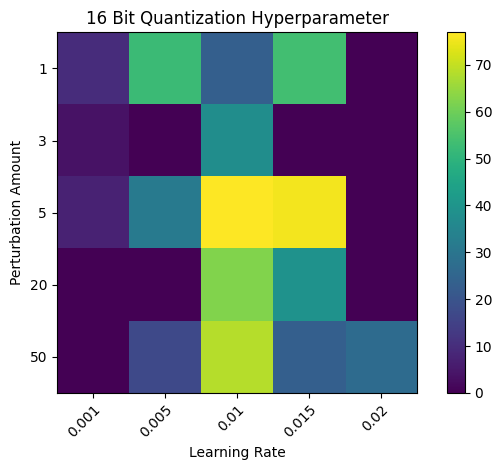

In [20]:
vegetables = ["1", "3", "5", "20", "50"]
farmers = ["0.001", "0.005", "0.01", "0.015", "0.02"]

harvest = np.array([[0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.6, 2.6,  6.3 , 6.2, 0.0],
                    [0.0, 0.0, 5.1, 3.2, 0.0],
                    [0.0, 1.4, 5.6, 1.9, 2.2]])

harvest = (harvest / 6.3) * 76.93

fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
#for i in range(len(vegetables)):
#    for j in range(len(farmers)):
#        text = ax.text(j, i, harvest[i, j],
#                       ha="center", va="center", color="w")

fig.colorbar(im, ax=ax)

ax.set_xlabel("Learning Rate")

ax.set_ylabel("Perturbation Amount")

ax.set_title("16 Bit Quantization Hyperparameter")
fig.tight_layout()
plt.show()


In [12]:
# perturb_mean, perturb_std = get_mean_std_run(run_perturb_df)
run_mean, run_std = get_mean_std_run(run_df)

/home/dima/Projects/NNCompression/visualize.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


{'accuracy': <Figure size 640x480 with 1 Axes>}

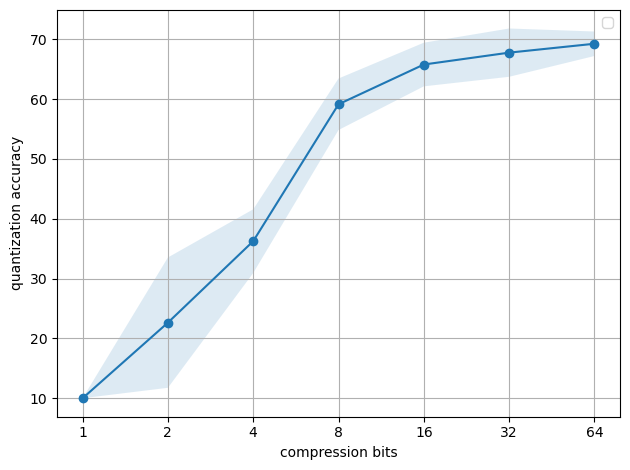

In [4]:
plot_quant_acc(run_mean, run_std)

In [6]:
run_perturb_df = pd.read_parquet("../result/grid_perturb_m/fc11756a20d9551271ee612c4033d624/run_data.parquet")
perturb_mean, perturb_std = get_mean_std_run(run_perturb_df)

/home/dima/Projects/NNCompression/visualize.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


{'accuracy': <Figure size 640x480 with 1 Axes>}

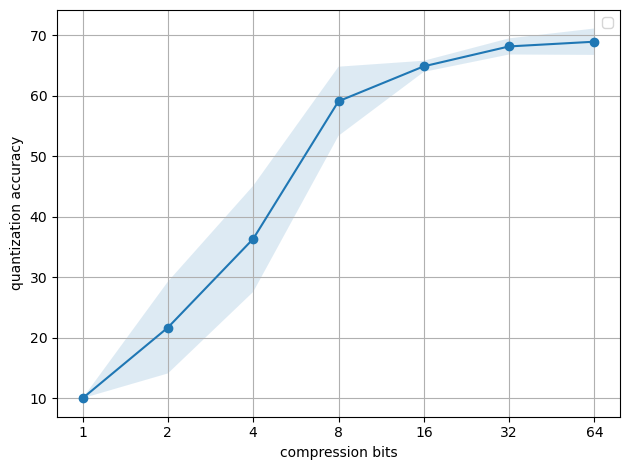

In [7]:
plot_quant_acc(perturb_mean, perturb_std)

/home/dima/Projects/NNCompression/visualize.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


{'accuracy': <Figure size 640x480 with 1 Axes>}

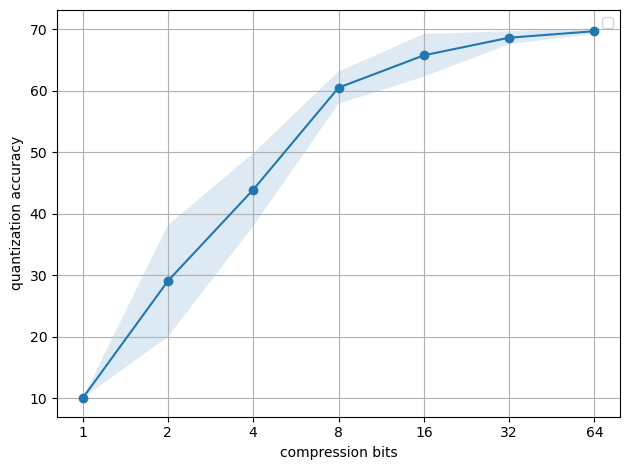

In [14]:
plot_quant_acc(run_mean, run_std)

{'accuracy': <Figure size 640x480 with 1 Axes>}

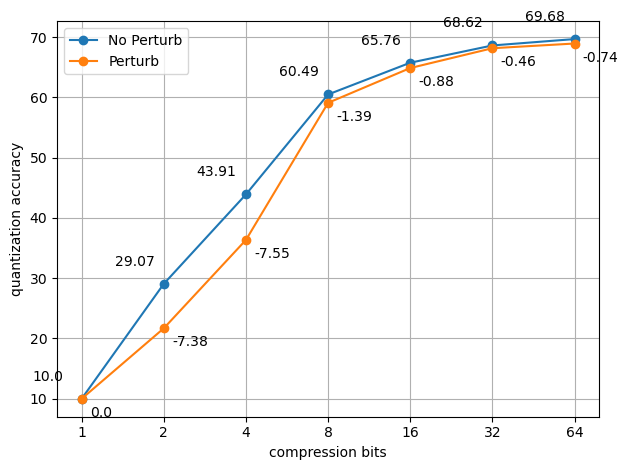

In [13]:
plot_quant_mean_perturb_acc(run_mean, perturb_mean)

In [15]:
run_perturb_df = pd.read_parquet("../result/grid_perturb_m/c3ba5e24d124d89585124c75d0484484/run_data.parquet")
perturb_mean, perturb_std = get_mean_std_run(run_perturb_df)

/home/dima/Projects/NNCompression/visualize.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


{'accuracy': <Figure size 640x480 with 1 Axes>}

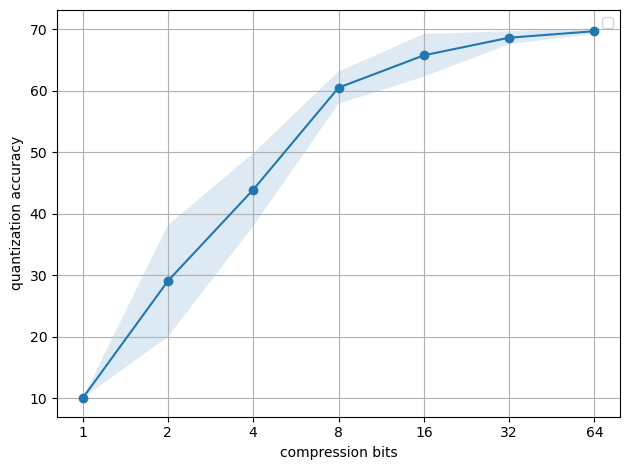

In [16]:
plot_quant_acc(run_mean, run_std)

{'accuracy': <Figure size 640x480 with 1 Axes>}

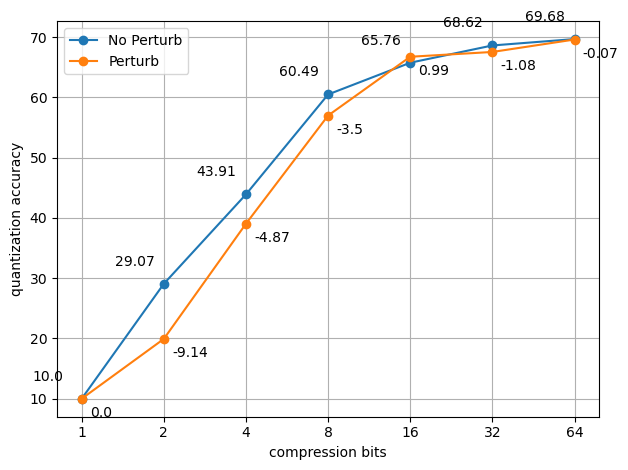

In [17]:
plot_quant_mean_perturb_acc(run_mean, perturb_mean)

learning_rate 0.01

weight_decay 1e-05

perturb_start 3

perturb_amount 15

perturb_variance 0.001

perturb_loss 1e-05

In [8]:
run_perturb_df = pd.read_parquet("../result/grid_perturb/20/run_data.parquet")
perturb_mean, perturb_std = get_mean_std_run(run_perturb_df)

{'accuracy': <Figure size 640x480 with 1 Axes>}

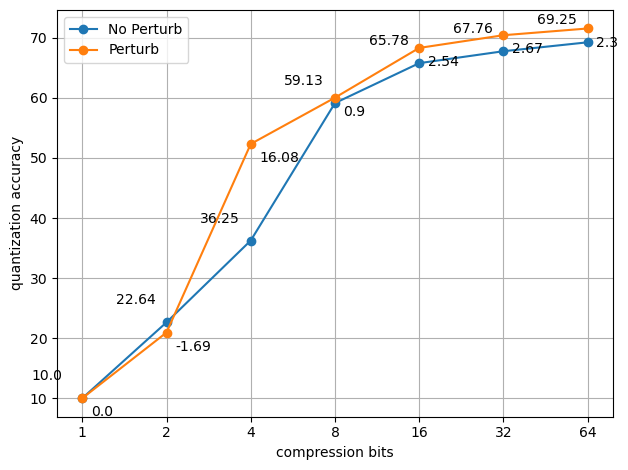

In [9]:
plot_quant_mean_perturb_acc(run_mean, perturb_mean)

/home/dima/Projects/NNCompression/visualize.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


{'accuracy': <Figure size 640x480 with 1 Axes>}

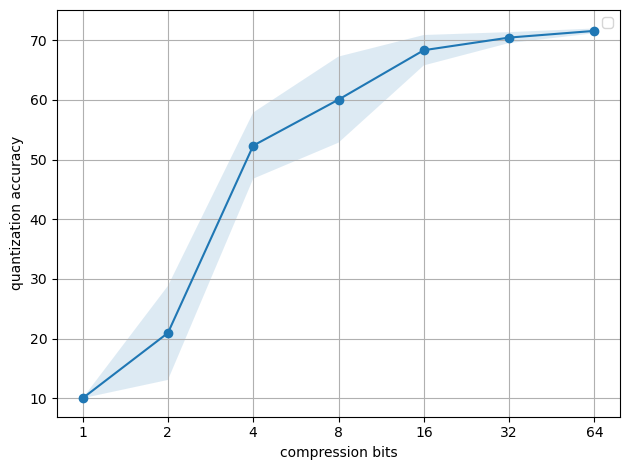

In [10]:
plot_quant_acc(perturb_mean, perturb_std)

learning_rate 0.01

weight_decay 1e-05

perturb_start 3

perturb_amount 1

perturb_variance 0.1

perturb_loss 0.0001

{'accuracy': <Figure size 640x480 with 1 Axes>}

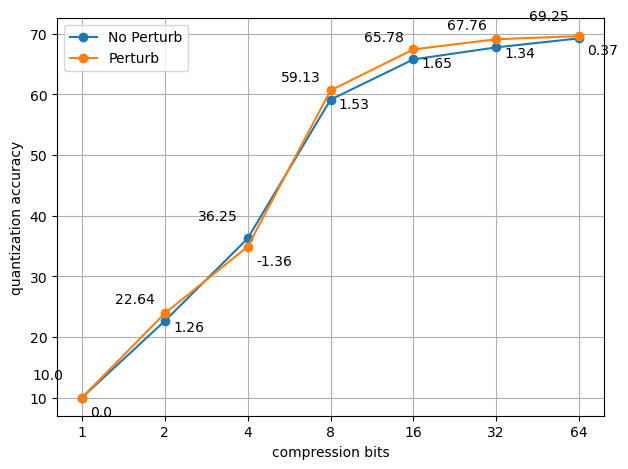

In [7]:
run_perturb_df = pd.read_parquet("../result/grid_perturb/31/run_data.parquet")
perturb_mean, perturb_std = get_mean_std_run(run_perturb_df)
plot_quant_mean_perturb_acc(run_mean, perturb_mean)

learning_rate 0.01

weight_decay 0.0001

perturb_start 3

perturb_amount 1

perturb_variance 0.01

perturb_loss 0.0001

{'accuracy': <Figure size 640x480 with 1 Axes>}

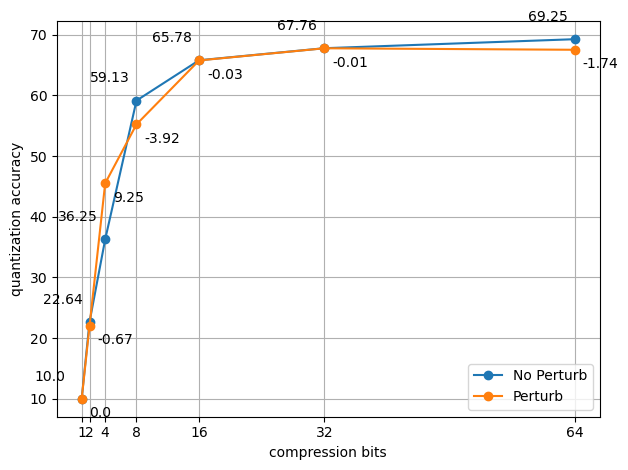

In [14]:
run_perturb_df = pd.read_parquet("../result/grid_perturb/62/run_data.parquet")
perturb_mean, perturb_std = get_mean_std_run(run_perturb_df)
plot_quant_mean_perturb_acc(run_mean, perturb_mean)

learning_rate 0.01

weight_decay 0.0001

perturb_start 1

perturb_amount 5

perturb_variance 0.001

perturb_loss 0.0001

{'accuracy': <Figure size 640x480 with 1 Axes>}

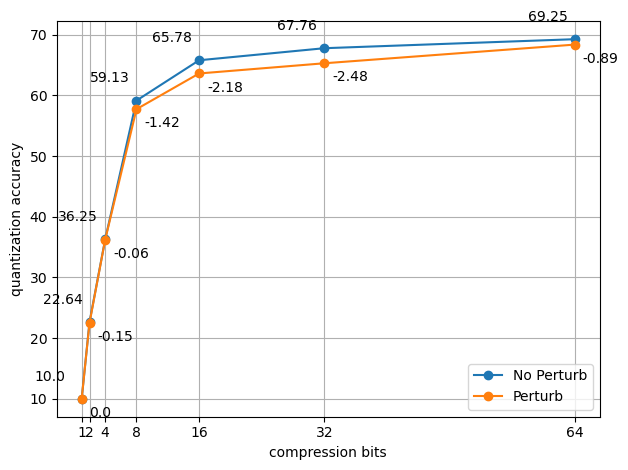

In [16]:
run_perturb_df = pd.read_parquet("../result/grid_perturb/63/run_data.parquet")
perturb_mean, perturb_std = get_mean_std_run(run_perturb_df)
plot_quant_mean_perturb_acc(run_mean, perturb_mean)

{'accuracy': <Figure size 640x480 with 1 Axes>}

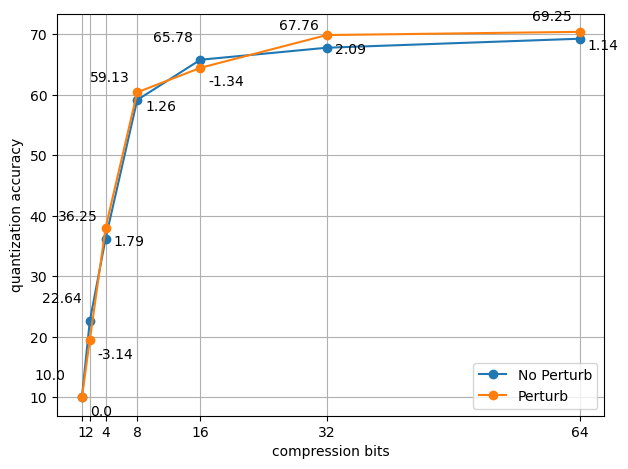

In [18]:
run_perturb_df = pd.read_parquet("../result/grid_perturb_spsa/18/run_data.parquet")
perturb_mean, perturb_std = get_mean_std_run(run_perturb_df)
plot_quant_mean_perturb_acc(run_mean, perturb_mean)

{'accuracy': <Figure size 640x480 with 1 Axes>}

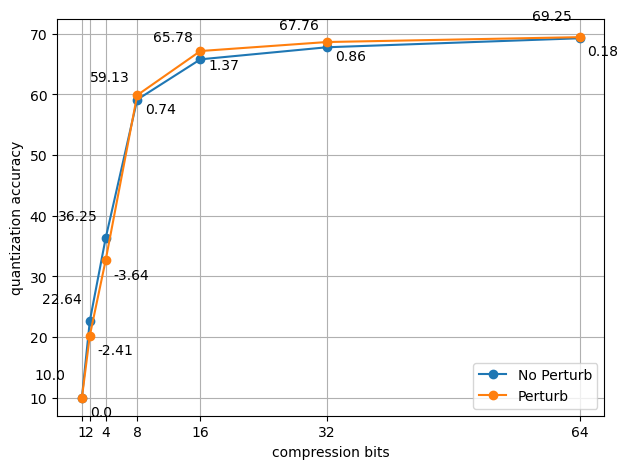

In [19]:
run_perturb_df = pd.read_parquet("../result/grid_perturb_spsa/83/run_data.parquet")
perturb_mean, perturb_std = get_mean_std_run(run_perturb_df)
plot_quant_mean_perturb_acc(run_mean, perturb_mean)